Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)
Number of classes: 10


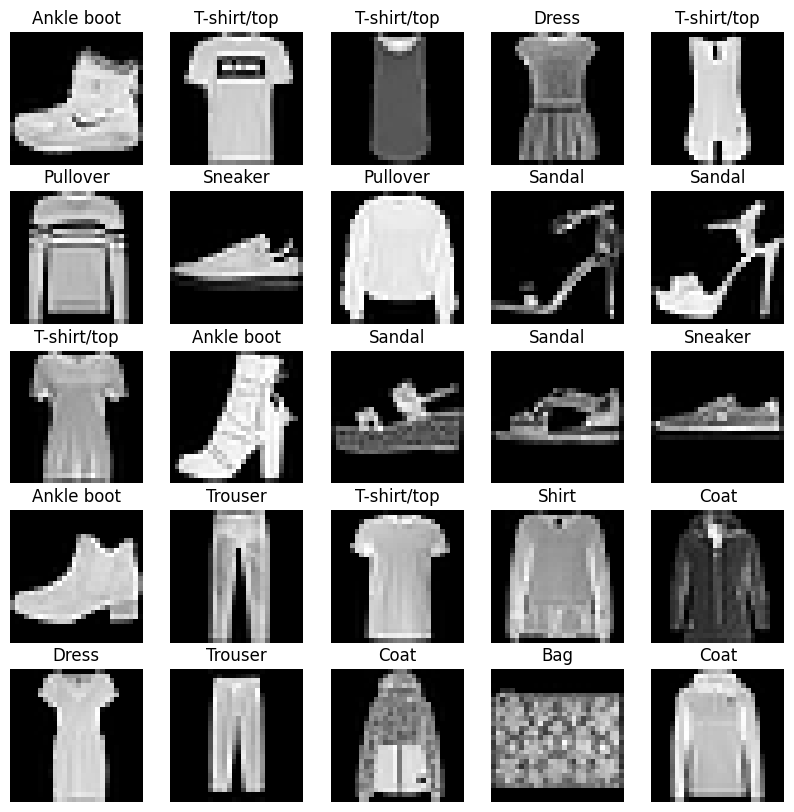

In [5]:
## Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist


# Load the fMNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Explore the dataset
print("Training set shape:", train_images.shape)
print("Testing set shape:", test_images.shape)
print("Number of classes:", len(np.unique(train_labels)))

# Class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Display a few random images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_labels[train_labels[i]])
    plt.axis('off')
plt.show()


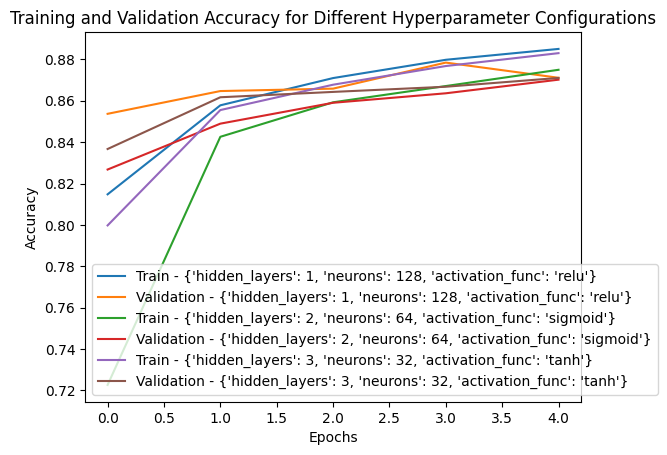

In [6]:
## Importing libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

# Load the fMNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

# Function to create and train a model with different hyperparameters
def create_and_train_model(hidden_layers, neurons, activation_func):
    model = keras.Sequential()
    model.add(layers.Dense(neurons, activation=activation_func, input_shape=(28 * 28,)))

    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(neurons, activation=activation_func))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2, verbose=0)

    return history

# Hyperparameter configurations
configurations = [
    {"hidden_layers": 1, "neurons": 128, "activation_func": "relu"},
    {"hidden_layers": 2, "neurons": 64, "activation_func": "sigmoid"},
    {"hidden_layers": 3, "neurons": 32, "activation_func": "tanh"}
]

# Train models with different hyperparameter configurations
for config in configurations:
    history = create_and_train_model(config["hidden_layers"], config["neurons"], config["activation_func"])

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Train - ' + str(config))
    plt.plot(history.history['val_accuracy'], label='Validation - ' + str(config))

# Display the plot
plt.title('Training and Validation Accuracy for Different Hyperparameter Configurations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 [==============================] - 0s 1ms/step
Accuracy: 85.88%


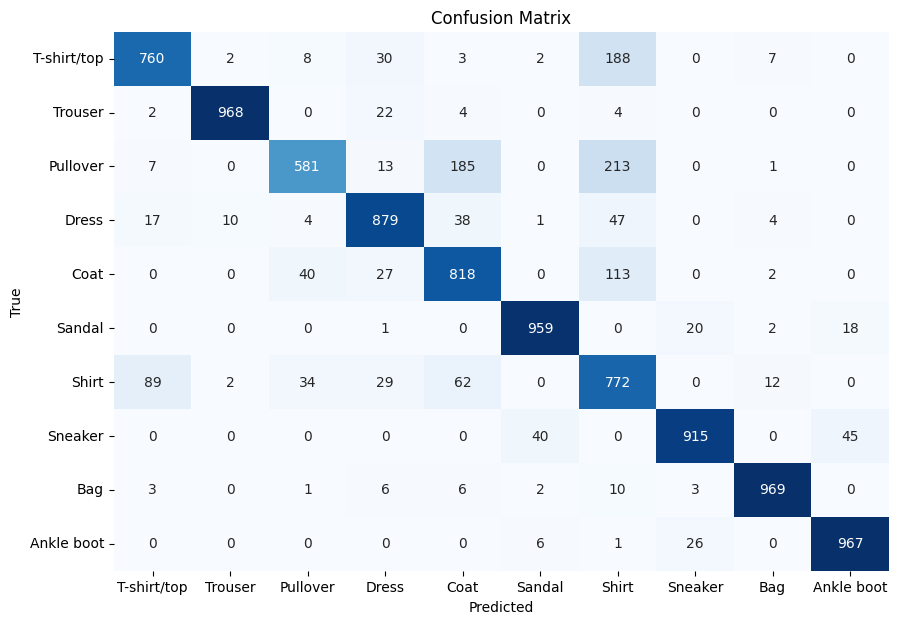

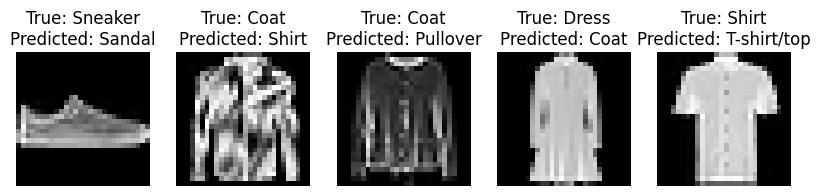

313/313 [==============================] - 0s 1ms/step
Accuracy: 86.24%


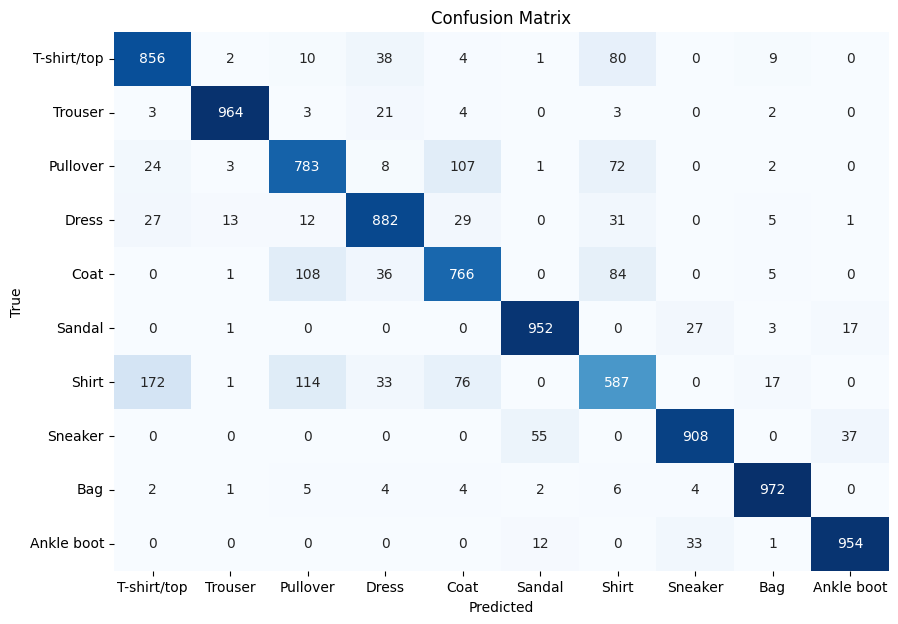

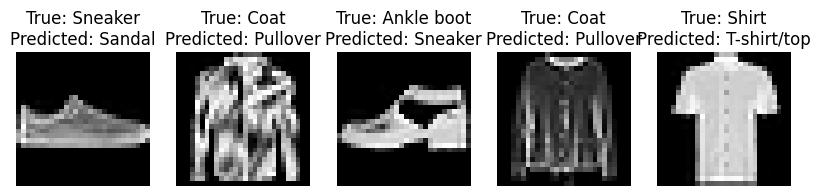

313/313 [==============================] - 0s 1ms/step
Accuracy: 86.13%


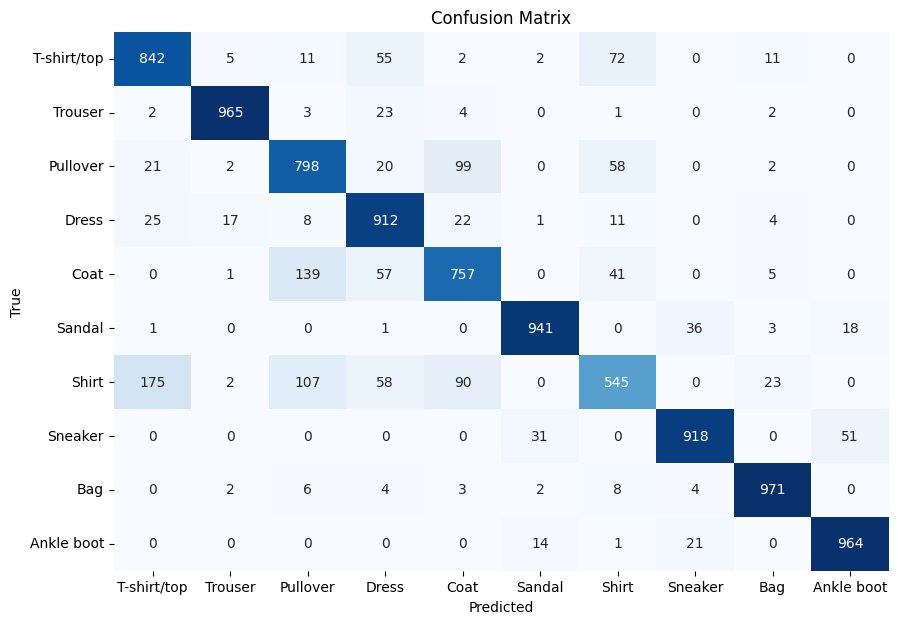

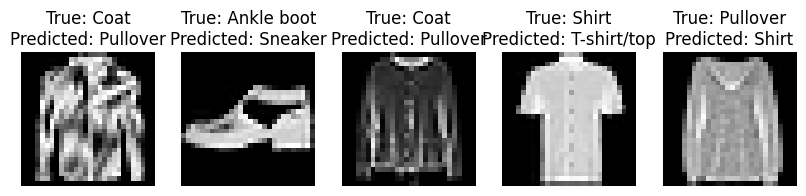


Evaluation of the Best Model:
313/313 [==============================] - 0s 1ms/step
Accuracy: 86.24%


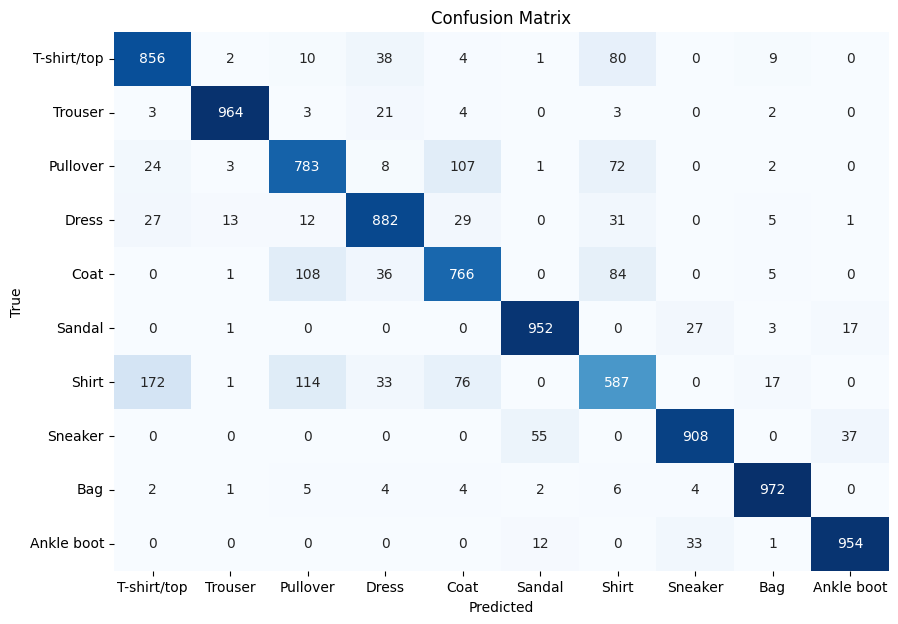

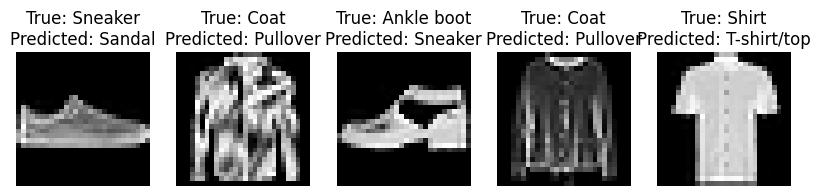

In [4]:
# Function to create a model with different hyperparameters
def create_model(hidden_layers, neurons, activation_func):
    model = keras.Sequential()
    model.add(layers.Dense(neurons, activation=activation_func, input_shape=(28 * 28,)))

    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(neurons, activation=activation_func))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Train models with different hyperparameter configurations and evaluate each
best_accuracy = 0
best_model = None

for config in configurations:
    model = create_model(config["hidden_layers"], config["neurons"], config["activation_func"])
    history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2, verbose=0)

    # Evaluate the model
    evaluate_model(model, test_images, test_labels)

    # Check if the current model has the best accuracy
    accuracy = model.evaluate(test_images, test_labels, verbose=0)[1]
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Evaluate the best model
print("\nEvaluation of the Best Model:")
evaluate_model(best_model, test_images, test_labels)
